In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'../data/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
data = data.rename(columns = {
    "profile pic" : "profile_pic", "nums/length username": "num_per_length_username", "nums/length fullname": "num_per_length_fullname", 
    "fullname words": "fullname_words", "name==username": "fullname_is_username", "description length": "bio_length", 
    "external URL": "url_in_bio", "fake":"fake_account"
})

In [6]:
data.head()

,profile_pic,num_per_length_username,fullname_words,num_per_length_fullname,fullname_is_username,bio_length,url_in_bio,private,#posts,#followers,#follows,fake_account
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [7]:
clean_data = data.copy()
clean_data.to_csv("../data/data-clean.csv")

In [8]:
X_train = data.drop("fake_account", axis = 1)
y_train = data.pop("fake_account")

In [9]:
#standardizing features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
model = LogisticRegression(solver = "saga", penalty = "elasticnet", random_state = 16, l1_ratio = 0.4)

In [11]:
model.fit(X_train, y_train)

c:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.4, penalty='elasticnet', random_state=16,
                   solver='saga')

In [12]:
#test data prep
test_data = pd.read_csv(r"../data/test.csv")
test_data = test_data.rename(columns = {
    "profile pic" : "profile_pic", "nums/length username": "num_per_length_username", "nums/length fullname": "num_per_length_fullname", 
    "fullname words": "fullname_words", "name==username": "fullname_is_username", "description length": "bio_length", 
    "external URL": "url_in_bio", "fake":"fake_account"
})

In [14]:
X_test = test_data.drop("fake_account", axis = 1)
y_test = test_data.pop("fake_account")

X_test = scaler.fit_transform(X_test)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[52,  8],
       [ 9, 51]], dtype=int64)

In [17]:
#checking for precision and recall 
from sklearn.metrics import precision_score, recall_score

print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")

Precision score: 0.864406779661017
Recall score: 0.85


Explain precision and Recall

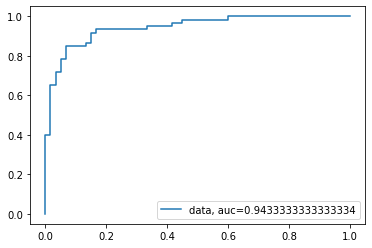

In [18]:
#plotting ROC curve
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"data, auc={str(auc)}")
plt.legend(loc=4)
plt.show()

Interpret ROC curve